In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [66]:
df = pd.read_csv("EMCT_detail_correlated_2025_0610_pandas.csv")
df.head()

,trailer_ID,trailer_volumn,pressure_prefill,temperature_prefill,date_filling,pressure_postfill,temperature_postfill,volumn_filled,trailer_ID_2,customer_name,customer_recieve_date,time_gap,customer_recieve_pressure,customer_recieve_temperature,customer_release_date,customer_release_pressure,customer_release_temperature,used_volumn_by_delivery
0,AL-0070,9.11,30,24,2025-01-04,157,22,973,AL-0070,MTB,2025-01-15,11.0,146.086498,14.0,2025-01-30,26.445593,19.0,"1,029"
1,AL-0065,9.12,27,14,2025-01-23,155,20,984,AL-0065,MTB,2025-01-30,7.0,150.009157,20.0,2025-02-12,40.174903,15.0,916
2,AL-0070,9.11,26,20,2025-02-10,154,22,980,AL-0070,MTB,2025-02-12,2.0,146.086498,17.0,2025-02-26,30.368253,13.0,977
3,AL-0065,9.12,35,15,2025-02-24,156,17,937,AL-0065,MTB,2025-02-26,2.0,149.028492,13.0,2025-03-13,29.387588,18.0,"1,033"
4,AL-0070,9.11,30,15,2025-03-11,155,22,951,AL-0070,MTB,2025-03-13,2.0,145.105832,19.0,2025-03-26,31.348918,23.0,962


In [67]:
# convert date to datetime object

df['date_filling'] = pd.to_datetime(df['date_filling'])
df['customer_recieve_date'] = pd.to_datetime(df['customer_recieve_date'])

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   trailer_ID                    423 non-null    object        
 1   trailer_volumn                423 non-null    float64       
 2   pressure_prefill              423 non-null    int64         
 3   temperature_prefill           423 non-null    int64         
 4   date_filling                  423 non-null    datetime64[ns]
 5   pressure_postfill             423 non-null    int64         
 6   temperature_postfill          423 non-null    int64         
 7   volumn_filled                 423 non-null    int64         
 8   trailer_ID_2                  419 non-null    object        
 9   customer_name                 413 non-null    object        
 10  customer_recieve_date         413 non-null    datetime64[ns]
 11  time_gap                      41

In [69]:
df['customer_name'].unique()

array(['MTB', 'Nanya', 'TSMC_12P8', 'TSMC_15P1', 'TSMC_18P4', 'TSMC_18P5',
       'TSMC_18P6', 'TSMC_20P1', 'TSMC_20P2', 'TSMC_7', 'TSMC_AP6B', nan],
      dtype=object)

# 1. Examine pressure distribution on EMCT (prefill & postfill)`

Axes(0.125,0.11;0.775x0.77)


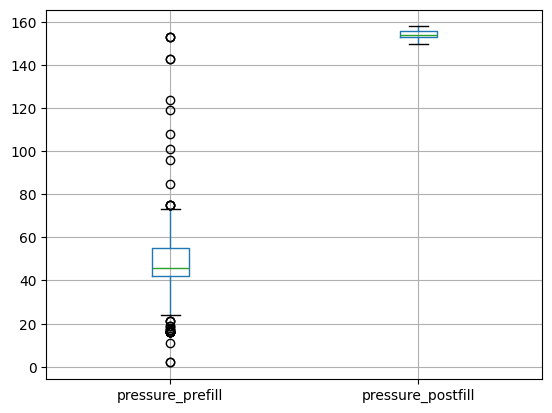

In [70]:
print(df.boxplot(column = ['pressure_prefill','pressure_postfill']))

This result correlate with the effective and controlled process that are applied by taking a variable initial pressure and reliably adjusts it to a consistent, high-pressure final state (method of fill by final pressure)




In [71]:
df[df['pressure_prefill'] < 80]

,trailer_ID,trailer_volumn,pressure_prefill,temperature_prefill,date_filling,pressure_postfill,temperature_postfill,volumn_filled,trailer_ID_2,customer_name,customer_recieve_date,time_gap,customer_recieve_pressure,customer_recieve_temperature,customer_release_date,customer_release_pressure,customer_release_temperature,used_volumn_by_delivery
0,AL-0070,9.11,30,24,2025-01-04,157,22,973,AL-0070,MTB,2025-01-15,11.0,146.086498,14.0,2025-01-30,26.445593,19.0,"1,029"
1,AL-0065,9.12,27,14,2025-01-23,155,20,984,AL-0065,MTB,2025-01-30,7.0,150.009157,20.0,2025-02-12,40.174903,15.0,916
2,AL-0070,9.11,26,20,2025-02-10,154,22,980,AL-0070,MTB,2025-02-12,2.0,146.086498,17.0,2025-02-26,30.368253,13.0,977
3,AL-0065,9.12,35,15,2025-02-24,156,17,937,AL-0065,MTB,2025-02-26,2.0,149.028492,13.0,2025-03-13,29.387588,18.0,"1,033"
4,AL-0070,9.11,30,15,2025-03-11,155,22,951,AL-0070,MTB,2025-03-13,2.0,145.105832,19.0,2025-03-26,31.348918,23.0,962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,EN-2108,18.37,21,28,2025-05-27,155,28,2039,客戶尚未紀錄 (還沒用),NaN,NaT,NaN,-1.013252,NaN,NaN,-1.013027,NaN,NaN
419,NK-8233,17.71,44,24,2025-05-28,154,28,1588,客戶尚未紀錄 (還沒用),NaN,NaT,NaN,-1.013252,NaN,NaN,-1.013027,NaN,NaN
420,EN-2106,18.37,43,28,2025-05-28,155,25,1709,客戶尚未紀錄 (還沒用),NaN,NaT,NaN,-1.013252,NaN,NaN,-1.013027,NaN,NaN
421,EN-2002,18.37,52,26,2025-05-29,157,30,1554,客戶尚未紀錄 (還沒用),NaN,NaT,NaN,-1.013252,NaN,NaN,-1.013027,NaN,NaN


In [72]:
df[df['pressure_prefill'] > 140]

,trailer_ID,trailer_volumn,pressure_prefill,temperature_prefill,date_filling,pressure_postfill,temperature_postfill,volumn_filled,trailer_ID_2,customer_name,customer_recieve_date,time_gap,customer_recieve_pressure,customer_recieve_temperature,customer_release_date,customer_release_pressure,customer_release_temperature,used_volumn_by_delivery
13,NK-3430,17.71,143,25,2025-01-10,154,25,154,NK-3430,Nanya,2025-01-17,7.0,152.951153,12.0,2025-01-27,13.696948,12.0,2631
20,CP-0702,18.21,153,22,2025-03-10,153,22,0,CP-0702,Nanya,2025-03-14,4.0,150.989823,17.0,2025-03-23,23.503598,14.0,2429
21,EN-2001,18.37,153,20,2025-03-20,153,20,0,EN-2001,Nanya,2025-03-23,3.0,150.009157,15.0,2025-04-01,34.290913,12.0,2237
25,RN-2308,19.14,153,26,2025-04-24,153,26,0,RN-2308,Nanya,2025-04-28,4.0,150.989823,23.0,2025-05-07,21.542268,21.0,2542
413,NK-3430,17.71,143,25,2025-01-06,155,25,168,NaN,NaN,NaT,NaN,-1.013252,NaN,NaN,-1.013027,NaN,NaN


# 2. Examine distribution on EMCT (prefill & postfill)

Axes(0.125,0.11;0.775x0.77)


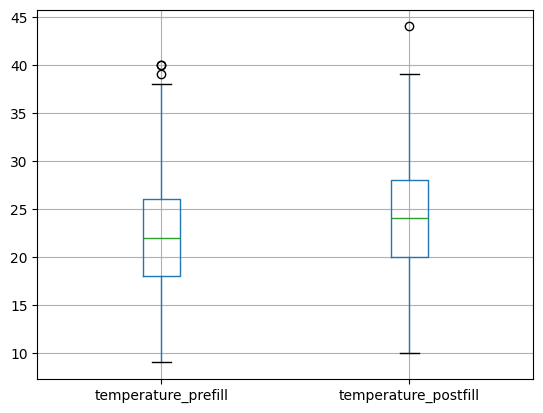

In [73]:
print(df.boxplot(column = ['temperature_prefill','temperature_postfill']))

the plot strongly implies that the filling process consistently raises the temperature, but it does not significantly change the overall variability of the temperature readings

In [74]:
df[df['temperature_prefill'] > 35]

,trailer_ID,trailer_volumn,pressure_prefill,temperature_prefill,date_filling,pressure_postfill,temperature_postfill,volumn_filled,trailer_ID_2,customer_name,customer_recieve_date,time_gap,customer_recieve_pressure,customer_recieve_temperature,customer_release_date,customer_release_pressure,customer_release_temperature,used_volumn_by_delivery
24,EN-2102,18.37,44,36,2025-04-18,155,31,1667,EN-2102,Nanya,2025-04-19,1.0,148.047828,28.0,2025-04-28,17.619608,23.0,2414
111,NK-8249,17.71,56,36,2025-05-22,157,39,1403,NK-8249,TSMC_15P1,2025-05-26,4.0,150.989823,23.0,2025-05-30,48.020223,25.0,1490
166,EN-2109,18.37,43,38,2025-05-13,154,24,1724,EN-2109,TSMC_18P4,2025-05-18,5.0,151.970487,33.0,2025-05-23,42.136233,29.0,1588
170,CP-0702,18.21,46,39,2025-05-20,154,37,1573,CP-0702,TSMC_18P4,2025-05-28,8.0,144.125168,28.0,2025-06-01,49.000888,28.0,1393
240,EN-2101,18.37,46,36,2025-05-14,154,36,1587,EN-2101,TSMC_18P5,2025-05-18,4.0,146.086498,33.0,2025-05-22,41.155568,30.0,1524
246,EN-2109,18.37,44,36,2025-05-23,155,30,1674,EN-2109,TSMC_18P5,2025-05-30,7.0,148.047828,25.0,2025-06-03,42.136233,28.0,1588
302,EN-1901,18.37,49,36,2025-05-14,154,26,1612,EN-1901,TSMC_18P6,2025-05-19,5.0,147.067162,31.0,2025-05-24,42.136233,27.0,1530
304,EN-2202,18.37,45,40,2025-05-19,154,28,1668,EN-2202,TSMC_18P6,2025-05-24,5.0,150.989823,31.0,2025-05-29,41.155568,26.0,1597
384,EN-2002,18.37,26,40,2025-05-15,156,36,1931,EN-2002,TSMC_20P2,2025-05-21,6.0,150.989823,39.0,2025-05-28,55.865543,31.0,1330


In [75]:
df[df['temperature_postfill'] > 35]

,trailer_ID,trailer_volumn,pressure_prefill,temperature_prefill,date_filling,pressure_postfill,temperature_postfill,volumn_filled,trailer_ID_2,customer_name,customer_recieve_date,time_gap,customer_recieve_pressure,customer_recieve_temperature,customer_release_date,customer_release_pressure,customer_release_temperature,used_volumn_by_delivery
92,NK-8249,17.71,50,22,2025-04-15,153,38,1409,NK-8249,TSMC_15P1,2025-04-20,5.0,149.028492,27.0,2025-04-24,44.097563,25.0,1494
99,NK-8233,17.71,42,28,2025-04-29,153,37,1553,NK-8233,TSMC_15P1,2025-05-04,5.0,152.951153,30.0,2025-05-08,42.136233,27.0,1560
102,NK-8249,17.71,40,26,2025-05-06,156,38,1613,NK-8249,TSMC_15P1,2025-05-10,4.0,148.047828,24.0,2025-05-14,49.981553,27.0,1418
104,NK-8233,17.71,42,27,2025-05-08,156,36,1598,NK-8233,TSMC_15P1,2025-05-14,6.0,153.931817,33.0,2025-05-18,43.116898,29.0,1543
105,NK-2485,17.71,43,22,2025-05-14,155,36,1558,NK-2485,TSMC_15P1,2025-05-16,2.0,151.970487,32.0,2025-05-20,40.174903,28.0,1565
108,NK-3430,17.71,51,30,2025-05-19,155,37,1448,NK-3430,TSMC_15P1,2025-05-24,5.0,146.086498,26.0,2025-05-28,36.252243,25.0,1579
109,NK-8233,17.71,44,30,2025-05-20,155,44,1508,NK-8233,TSMC_15P1,2025-05-21,1.0,149.028492,33.0,2025-05-24,44.097563,26.0,1456
110,NK-2485,17.71,42,28,2025-05-21,155,37,1580,NK-2485,TSMC_15P1,2025-05-22,1.0,153.931817,33.0,2025-05-26,41.155568,19.0,1550
111,NK-8249,17.71,56,36,2025-05-22,157,39,1403,NK-8249,TSMC_15P1,2025-05-26,4.0,150.989823,23.0,2025-05-30,48.020223,25.0,1490
169,EN-2205,18.37,43,27,2025-05-20,158,37,1662,EN-2205,TSMC_18P4,2025-05-25,5.0,150.009157,34.0,2025-05-30,44.097563,26.0,1517


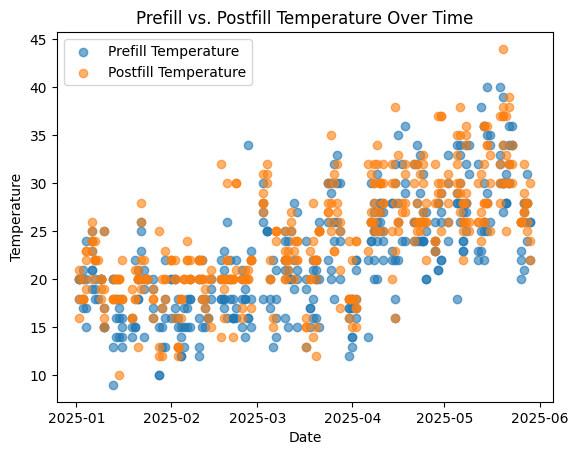

temperature prefill:
std: 22.425531914893618
mean 6.008959395942304

temperatiure postfill:
mean: 24.189125295508273
std 5.878483131303698


In [76]:
# examine temperature dependence on date
# make a scatter plot
plt.scatter(df['date_filling'], df['temperature_prefill'], alpha=0.6, label='Prefill Temperature') # alpha makes points slightly transparent
plt.scatter(df['date_filling'], df['temperature_postfill'], alpha=0.6, label='Postfill Temperature') # alpha makes points slightly transparent
plt.title('Prefill vs. Postfill Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# cauculate statistical parameters
print("temperature prefill:")
print("std:", df['temperature_prefill'].mean())
print("mean", df['temperature_prefill'].std())
print()
print("temperatiure postfill:")
print("mean:",df['temperature_postfill'].mean())
print("std",df['temperature_postfill'].std())

Clear Seasonal Trend: Both the temperature_prefill and temperature_postfill show a distinct upward trend from January 2025 to June 2025. This strongly suggests that the temperature is influenced by the time of year, with values being lower in the winter months and progressively increasing as it gets warmer towards the summer.

# Perfrom correlation mapping using heat map

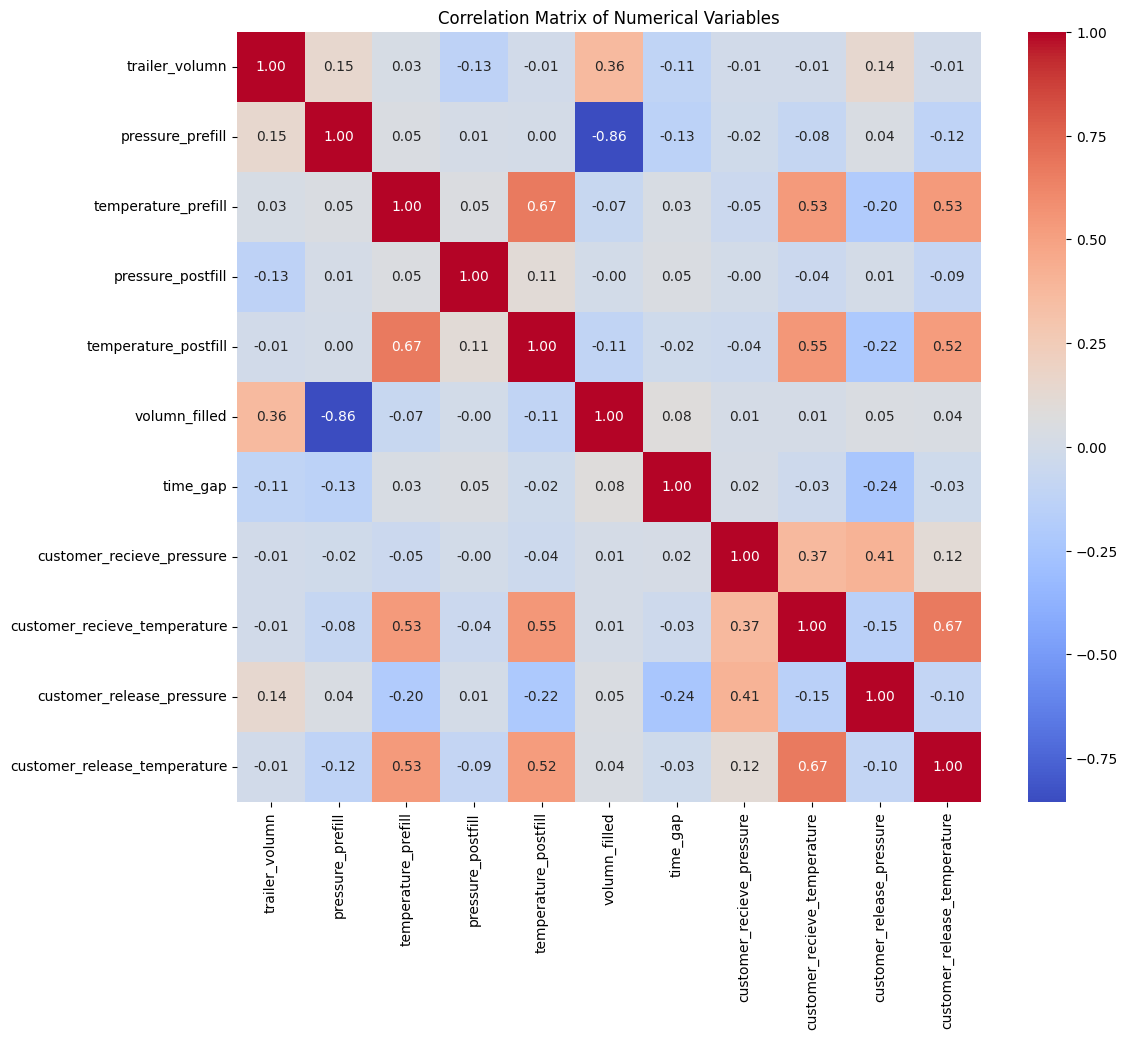

In [77]:
# Select only the numerical columns for correlation
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

1. This means that the higher the pressure in the trailer before filling, the less volume can be added. This makes perfect physical sense: a trailer that is returned with high residual pressure is already partially full, so less new product can be added.
2. This suggests that all temperature readings are heavily influenced by a common factor, which is almost certainly the ambient/seasonal temperature. When it's a hot day, all temperature measurements tend to be higher throughout the entire process.
3. In summary, the heatmap powerfully confirms that the starting pressure is the biggest driver of how much volume can be filled, and that all temperature measurements are linked by the outside weather conditions.

/tmp/ipython-input-78-1155395467.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


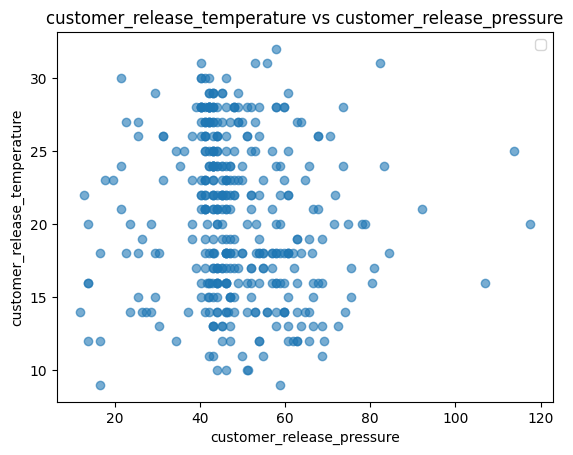

In [78]:
plt.scatter(df['customer_release_pressure'], df['customer_release_temperature'], alpha=0.6) # alpha makes points slightly transparent
plt.title('customer_release_temperature vs customer_release_pressure')
plt.xlabel('customer_release_pressure')
plt.ylabel('customer_release_temperature')
plt.legend()
plt.show()

# 3. Establish a predictive model on how much filled volume required based on the prefill pressure using ordinary least sqaured model (OLS)

step1. Prepare dataset

In [79]:
# use pressure_prefill to predict volumn_filled using OLS model

df_normal = df[(df['pressure_prefill'] < 80) & (df['volumn_filled'] > 1000)]
# setting the normal prefill pressure at 80barA (97.16% of all pressure_prefill measurements are lower than 80 barA)

ols_data = df_normal[['pressure_prefill', 'volumn_filled']]
# use two columns as subset for OLS prediction

ols_data

,pressure_prefill,volumn_filled
11,2,2393
12,16,2279
14,17,2215
15,16,2177
16,70,1398
...,...,...
418,21,2039
419,44,1588
420,43,1709
421,52,1554


step2. import necessary library

In [80]:
# Import ols function
from statsmodels.formula.api import ols

step3. write the formula

In [81]:
ols_formula = "volumn_filled~pressure_prefill"
# using pressure_prefill to predict volume_filled

step4. Build OLS model, fit model to data

In [82]:
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          volumn_filled   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     4241.
Date:                Thu, 26 Jun 2025   Prob (F-statistic):          1.10e-214
Time:                        04:56:17   Log-Likelihood:                -2216.6
No. Observations:                 401   AIC:                             4437.
Df Residuals:                     399   BIC:                             4445.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2381.0095     12.042    197.719      0.000    2357.335    2404.684
pressure_prefill   -15.9016      0.244    -65.124      0.000     -16.382     -15.422
==============================================================================
Omnibus:                        0.232   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.126
Skew:                           0.036   Prob(JB):                        0.939
Kurtosis:                       3.050   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='pressure_prefill', ylabel='volumn_filled'>

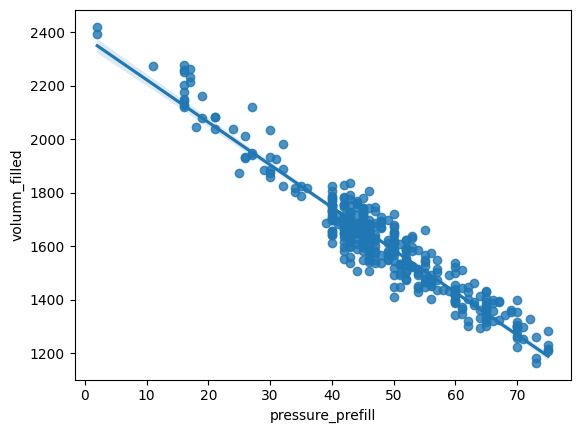

In [83]:
sns.regplot(x = "pressure_prefill", y = "volumn_filled", data = ols_data)
# make a scatter plot to visualize the model

step5. checking model assumptions:
"Linearity"
"Normality"
"Independent observations"
“Homoscedasticity”

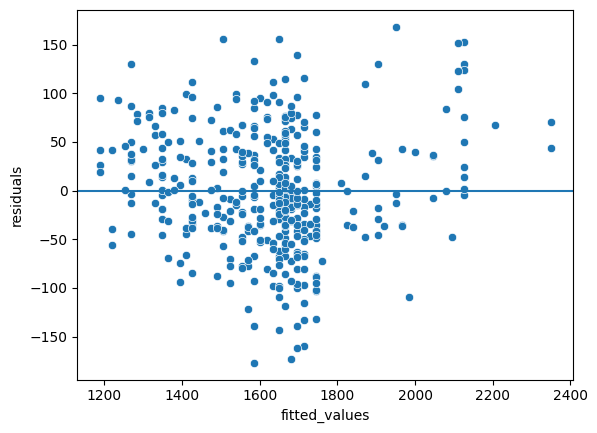

In [84]:
# make a scatter plot to see how residuals depends on x variable
x_subset = ols_data['pressure_prefill']

# Get predictions from model
fitted_values = model.predict(x_subset)

# cauculate residual values
residuals = model.resid

# make a scatterplot to visualize the distribution of residuals
fig = sns.scatterplot(x = fitted_values, y = residuals)
fig.set_xlabel("fitted_values")
fig.set_ylabel("residuals")
fig.axhline(0)
plt.show()

<Axes: >

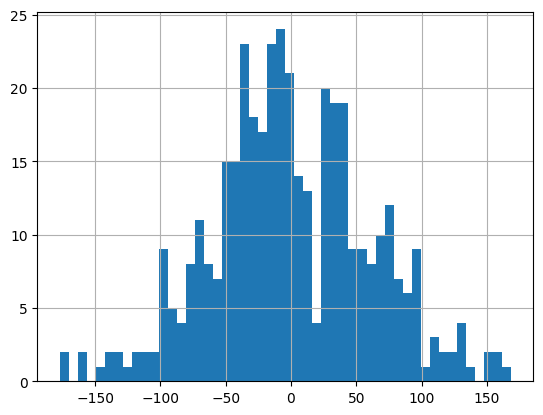

In [85]:
residuals.hist(bins = 50)

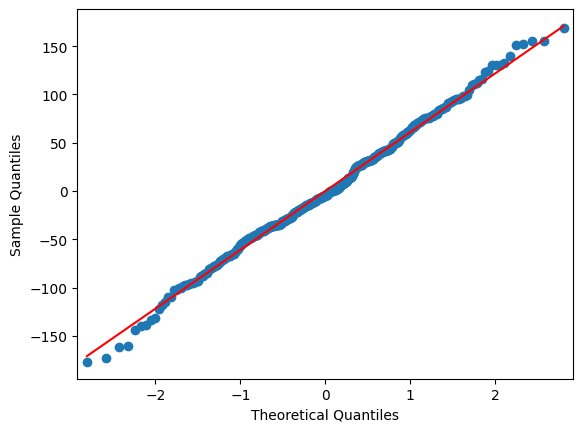

In [86]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()